<a href="https://colab.research.google.com/github/andrebelem/ASTOC/blob/main/SNIPPET_Campo_de_Tupi_desazonaliza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

#df_tupi = pd.read_csv('tupi_sst_mean.csv',decimal=',',sep=';')
# também posso pegar do github
df_tupi = pd.read_csv('https://raw.githubusercontent.com/andrebelem/ASTOC/main/dados_publicos/tupi_sst_mean.csv',decimal=',',sep=';')
df_tupi.time = pd.to_datetime(df_tupi.time)
df_tupi = df_tupi.set_index('time')
# não há uma necessidade muito grande de manter neste padrão, mas obviamente você
# terá que adaptar o código abaixo se quiser mudar (por exemplo) os nomes das colunas

<Axes: xlabel='ano', ylabel='SST [$\\degree$C]'>

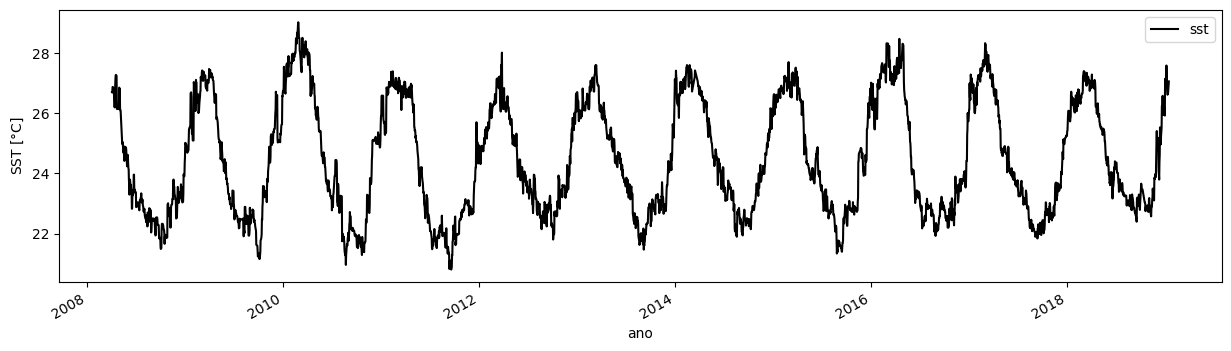

In [3]:
df_tupi.plot(color='k',xlabel='ano',ylabel='SST [$\degree$C]',figsize=(15,4))

<Axes: xlabel='ano', ylabel='SST [$\\degree$C]'>

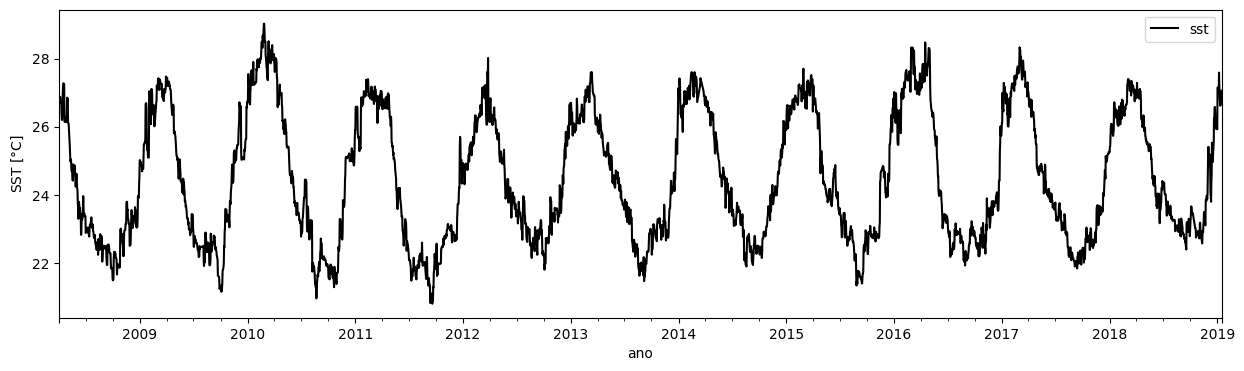

In [4]:
# para garantir que meus dados estão corretos, vou reamostrar em 1D e interpolar onde os valores se perderam.
df_tupi_interp = df_tupi.resample('1D').mean().interpolate(method ='linear', limit_direction ='forward')
df_tupi_interp.plot(color='k',xlabel='ano',ylabel='SST [$\degree$C]',figsize=(15,4))

In [5]:
# duas informações aqui são muito importantes: seu delta-t (que já estipulamos ser 1 dia) e o tamanho em anos da sua série
from dateutil.relativedelta import relativedelta
difference_in_years = relativedelta(df_tupi_interp.index[-1],
                                    df_tupi_interp.index[0]).years
print(f'Total da série: {difference_in_years} anos')

Total da série: 10 anos


In [6]:
# garanta que seus dados estão no formato certo
df_tupi_interp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3942 entries, 2008-04-02 to 2019-01-16
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sst     3942 non-null   float64
dtypes: float64(1)
memory usage: 61.6 KB


In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Realizando a decomposição sazonal da série temporal de SST
decomp = seasonal_decompose(df_tupi_interp['sst'], model='additive', period=365,two_sided=True)  # Ajuste o período conforme necessário

# Obtendo a componente sazonal
sazonal = decomp.seasonal

# Removendo a componente sazonal da série temporal de SST
no_season = df_tupi_interp['sst'] - sazonal

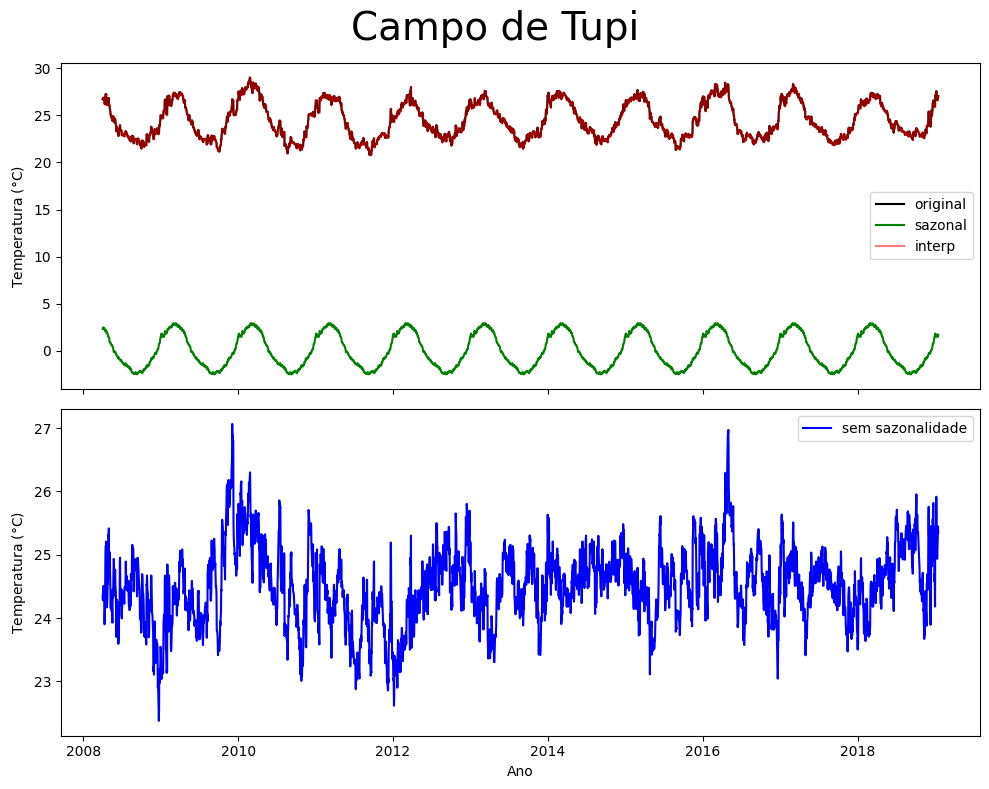

In [10]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Primeiro gráfico: SST original e interpolada
ax1.plot(df_tupi, color='k', label='original')
ax1.plot(sazonal, color='g', label='sazonal')
ax1.plot(df_tupi_interp, marker='.', markersize=0.2, alpha=0.5, color='r', label='interp')
ax1.set_ylabel('Temperatura ($\degree$C)')
ax1.legend()

# Segundo gráfico: SST sem sazonalidade
ax2.plot(no_season, color='b', label='sem sazonalidade')
ax2.set_ylabel('Temperatura ($\degree$C)')
ax2.set_xlabel('Ano')
ax2.legend()

plt.suptitle('Campo de Tupi', fontsize=28)
plt.tight_layout()
plt.show()